# Project: Investigation of The Movie DataBase (tmdb).

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The movie database dataset contains 10886 movies containing 21 features. There will be some features dropped from analysis because some will not be necessary for the data exploration and visualtion such as id, imdb_id and some others.
Three questions will be posed and possibly answered through the data analysis process:



1. The popularity of movies from 1960 to 2015. What is the time frame of niche genres are produced in the marketplace  until the public gets bored of the genre.
2. The movie rating from the public in comparision to its bugdet and revenue generated.
3. Top 10 profitable directors and movie production companies.

In [1]:
# Importing the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

The dataset was called used pandas read_csv method. I identified the maximum number of samples the dataset contains as well as the number of features or dimensions. Then, the info and describe methods are used to retrieve datatype, size and statistical properties of each feature within the dataset. After this glance, the features that would be dropped from this analysis are as follows:
 * popularity
 * imdb_id
 * cast
 * homepage
 * tagline
 * overview
 * budjet_adj
 * revenue_adj
 
The popularity feature is not described properly unless you visit the the website to see how it is calculated.
[popularity](https://www.themoviedb.org/talk/5141d424760ee34da71431b0) gives further insight how it is evaluated.

Quoting the mod of TMBD website, Travis Bell:

> It's mostly the same as before. Unique views on the website but improved with taking in account the number of ratings a movie received, number of favourites and number of watched list additions all for the previous day. It also uses the part of the previous days score to help popularity trending and finally, boosts scores a tad if the newer a release date is.
 
My assumption from the quote is that popularity feature is time dependent and specific to the views to their website and not a general feeling how the movie was released at that time. 
 
These features that are being discarded will be needed in answering the question I proposed for this exploration of the dataset. The budget listed as a feature is the production budget and not the total budget use to produced and market the film. Hence the budget column is an underestimated value of cost of the movie and it is difficult to acquire the cost to market each film in the the movie database. So I will just assume the budget feature accounts for all the cost to sell the film.
 
### General Properties

In [2]:
df_movie = pd.read_csv('tmdb-movies.csv')
print("There are {} samples and {} features".format(df_movie.shape[0], df_movie.shape[1]))
df_movie.head()

There are 10866 samples and 21 features


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
print("Let us take a look at the features and the types of the features.")
df_movie.info()

Let us take a look at the features and the types of the features.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
rele

In [4]:
df_movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
columns_test = df_movie.isnull().any()
columns_test_df = pd.DataFrame({'column name': columns_test.index, 'Is_Null': columns_test.values})
columns_null = columns_test_df[columns_test_df['Is_Null'] == True]
print("There are {} columns containing NULL or NAN, or missing data.".format(len(columns_null)))

There are 9 columns containing NULL or NAN, or missing data.


### Data Cleaning 
Here are the following steps for cleaning this dataset for analysis:
* Removal of the columns specified in the introduction
* The column of production has multiple data in genre and production_company is a problem. Using the lambda function one can retrieve the first entry which is production company.
* The release date will be cast as a datetime object.
* Casting from float to int of the budget and revenue and actual_budget columns.
* Replace 0 values or NAN with the median of the values.
* Replace NAN values in string type data with 'unspecified.'


In [6]:
# Conversion to datetime object for the release date. 
df_movie['release_date'] = pd.to_datetime(df_movie['release_date'])

# Convert budget and revenue to int types since production and revenue values are usually quoted as whole numbers.
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj       

In [7]:
# Placin the mean budget and mean revenue into variable names
mean_budget = int(df_movie['budget'].mean())
mean_revenue = int(df_movie['revenue'].mean())

In [8]:
# Now let us drop the columns I specified within the introduction.
df_copy = df_movie
df_copy = df_copy.drop(['popularity','cast','homepage','keywords','imdb_id','overview','tagline','budget_adj','revenue_adj'], axis=1)
df_copy.head()

,id,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


In [9]:
# Checking and fulling null values in the column.
df_copy['director'] = df_copy['director'].fillna('unspecified')
df_copy['production_companies'] = df_copy['production_companies'].fillna('unspecified')
df_copy['genres'] = df_copy['genres'].fillna('unspecified')

In [10]:
# Need to check the results.
df_copy.query('director=="unspecified"').head(10)
df_copy.query('production_companies=="unspecified"').head(10)
df_copy.query('genres == "unspecified"').head(10)

,id,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
424,363869,0,0,Belli di papÃ,Guido Chiesa,100,unspecified,unspecified,2015-10-29,21,6.1,2015
620,361043,0,0,All Hallows' Eve 2,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,unspecified,Ruthless Pictures|Hollywood Shorts,2015-10-06,13,5.0,2015
997,287663,0,0,Star Wars Rebels: Spark of Rebellion,Steward Lee|Steven G. Lee,44,unspecified,unspecified,2014-10-03,13,6.8,2014
1712,21634,0,0,Prayers for Bobby,Russell Mulcahy,88,unspecified,Daniel Sladek Entertainment,2009-02-27,57,7.4,2009
1897,40534,0,0,Jonas Brothers: The Concert Experience,Bruce Hendricks,76,unspecified,unspecified,2009-02-27,11,7.0,2009
2370,127717,0,0,Freshman Father,Michael Scott,0,unspecified,unspecified,2010-06-05,12,5.8,2010
2376,315620,0,0,Doctor Who: A Christmas Carol,unspecified,62,unspecified,unspecified,2010-12-25,11,7.7,2010
2853,57892,0,0,Vizontele,YÄ±lmaz ErdoÄŸan,110,unspecified,unspecified,2001-02-02,12,7.2,2001
3279,54330,0,0,ì•„ê¸°ì™€ ë‚˜,Kim Jin-Yeong,96,unspecified,unspecified,2008-08-13,11,6.1,2008
4547,123024,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Danny Boyle,220,unspecified,BBC,2012-07-27,12,8.3,2012


In [11]:
# Since movies can be categorized by multiple genres, we would greatly extend the dataset we have multiple copies of the 
# same movie. Since the first string before the "|" for production_companies column is the production_company and the 
# second string sequence is the movie studio, we can strip the string to retrieve the movie company.
df_copy['production_companies'] = df_copy['production_companies'].apply(lambda st: st.split('|')[0])


In [12]:
df_copy.head()

,id,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios,2015-06-09,5562,6.5,2015
1,76341,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures,2015-05-13,6185,7.1,2015
2,262500,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment,2015-03-18,2480,6.3,2015
3,140607,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm,2015-12-15,5292,7.5,2015
4,168259,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures,2015-04-01,2947,7.3,2015


In [13]:
# Now, let us replace the zeros with the mean() with the copy of the dataframe.
df_copy['budget'] = df_copy['budget'].replace(0,mean_budget)
df_copy['revenue'] = df_copy['revenue'].replace(0,mean_revenue)

In [14]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
id                      10866 non-null int64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
director                10866 non-null object
runtime                 10866 non-null int64
genres                  10866 non-null object
production_companies    10866 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 1018.8+ KB


In [15]:
genre_list = list(map(str, (df_copy['genres'])))
genre_set = []
for j in genre_list:
    # split the genres to get indiviual genres.
    genre_splitting = list(map(str, j.split('|')))
    for jj in genre_splitting:
        if jj not in genre_set:
            genre_set.append(jj)
            
print(genre_set)

['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy', 'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy', 'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror', 'Documentary', 'TV Movie', 'unspecified', 'Foreign']


<a id='eda'></a>
## Exploratory Data Analysis

Success for movie means different things to the people involved in the life of movie. The <mark>producers and movie studios</mark> would like to make alot of profit. <mark>Theaters</mark> would like the movie to be a success so more people would come to their venue and spend more money. The audience would like a good movie so that they feel their purchase to see the movie is worth their money. <mark>Critics</mark> analyze a movie in different aspects (not related to profit the movie) to see if it is a successful or good movie. 

### Identifying niche genres and examining their trends throughout the year range.

A dataframe will be created from the pandas dataframe(df_copy) to analyze the count of each genre for each year. A pie chart will be plotted and then three niche genres (<= 5%) and plot their trends from 1960 to 2015 to see the rise and fall of popularity of these films. Each film falls in multiple genres so it was easier to perform a count of each genre for each year.



In [16]:
max_year, min_year = df_copy['release_year'].max(), df_copy['release_year'].min()
print("The most recent year in this dataset:{} and earliest year:{}".format(max_year, min_year))

The most recent year in this dataset:2015 and earliest year:1960


In [17]:
# dataframe for genre counts 
genre_dataframe = pd.DataFrame(index=genre_set, columns=range(min_year, max_year + 1))

#populate the cells with zeros for now.
genre_dataframe = genre_dataframe.fillna(value = 0)
genre_dataframe.head(4)


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adventure,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Science Fiction,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Thriller,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Now populate the dataframe with the count of each genre for each year

year_re = np.array(df_copy['release_year'])
z_count = 0
for i in genre_list:
    split_genre = list(map(str,i.split('|')))
    for j in split_genre:
        genre_dataframe.loc[j, year_re[z_count]] = genre_dataframe.loc[j, year_re[z_count]] + 1
    z_count+=1
genre_dataframe.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,8,7,8,4,5,9,14,7,6,10,...,80,95,99,108,108,115,99,121,129,107
Adventure,5,6,7,7,5,6,11,7,5,5,...,55,60,63,72,59,62,50,67,67,69
Science Fiction,3,4,2,2,4,2,6,4,4,3,...,30,41,52,71,46,56,54,61,62,86
Thriller,6,0,7,10,9,11,8,5,5,3,...,114,125,127,157,135,146,160,175,179,171
Fantasy,2,2,1,2,4,0,2,3,5,2,...,34,47,43,49,44,46,34,39,36,33


Calculating the sum across the year range

In [19]:
genre_dataframe['sum_genre'] = genre_dataframe.values[:,:].sum(1)
genre_dataframe.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,sum_genre
Action,8,7,8,4,5,9,14,7,6,10,...,95,99,108,108,115,99,121,129,107,2385
Adventure,5,6,7,7,5,6,11,7,5,5,...,60,63,72,59,62,50,67,67,69,1471
Science Fiction,3,4,2,2,4,2,6,4,4,3,...,41,52,71,46,56,54,61,62,86,1230
Thriller,6,0,7,10,9,11,8,5,5,3,...,125,127,157,135,146,160,175,179,171,2908
Fantasy,2,2,1,2,4,0,2,3,5,2,...,47,43,49,44,46,34,39,36,33,916


Prepartion of variables for the pie chart plotting.

In [20]:
tot_sum_arr = genre_dataframe['sum_genre'].values
total_sum = sum(tot_sum_arr)

indvid_percent = [tot_sum_arr[x]/total_sum for x in range(len(tot_sum_arr))]

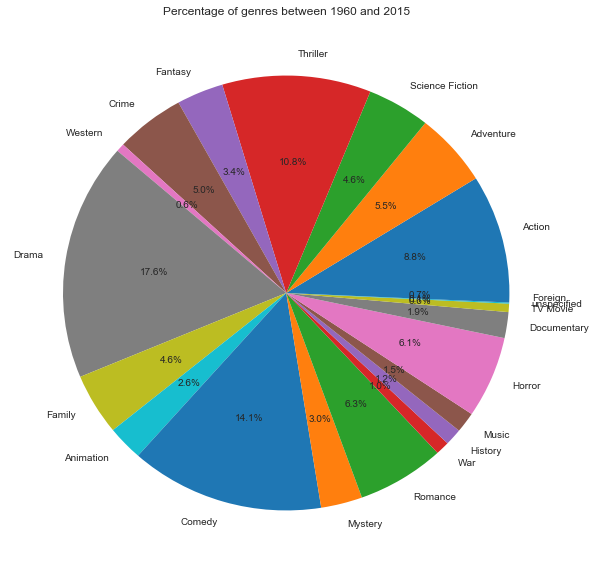

In [21]:
#plotting for the pie chart.
plt.figure(figsize=(10,10))
plt.pie(indvid_percent, labels = genre_set, autopct = '%1.1f%%', startangle =0)
plt.title("Percentage of genres between 1960 and 2015")
plt.show()

In [22]:
sorted_sum_values = genre_dataframe.sort_values(by=['sum_genre'], ascending = False)
print("Here are the top five most popular genres in terms of number of movies.\n")
sorted_sum_values.head()

Here are the top five most popular genres in terms of number of movies.



,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,sum_genre
Drama,13,16,21,13,20,20,16,16,20,13,...,197,233,224,211,214,232,253,284,260,4761
Comedy,8,10,5,13,16,7,16,17,9,12,...,151,169,198,169,172,176,175,185,162,3793
Thriller,6,0,7,10,9,11,8,5,5,3,...,125,127,157,135,146,160,175,179,171,2908
Action,8,7,8,4,5,9,14,7,6,10,...,95,99,108,108,115,99,121,129,107,2385
Romance,6,7,5,8,9,5,6,11,6,4,...,74,84,83,85,75,79,65,84,57,1712


The top five genres account for approximately 58% of the genres produced by the movie industry. These movie genres tend to blend in to each other as there basically no movie that falls into one genre. These genres are the go to for production companies to produce because they are the <mark>'easiest'</mark> to sell.

In [23]:
print("Here are the five least popular genres in terms of number of movies.\n")
sorted_sum_values.tail()

Here are the five least popular genres in terms of number of movies.



,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,sum_genre
War,2,2,3,1,3,8,4,1,4,3,...,6,18,12,7,9,10,7,23,9,270
Foreign,1,1,1,2,1,1,2,0,0,0,...,17,18,17,13,14,6,0,0,0,188
TV Movie,0,0,0,0,0,1,0,0,0,1,...,6,5,8,8,10,14,10,14,20,167
Western,6,3,3,2,1,4,7,2,1,7,...,5,2,0,6,3,4,3,6,6,165
unspecified,0,0,0,0,0,0,0,0,0,0,...,0,1,2,2,0,4,3,1,2,23


In [24]:
df_animation = genre_dataframe.loc['Animation']
df_war = genre_dataframe.loc['War']
df_western = genre_dataframe.loc['Western']

max_western = int(df_western[:56].max())
max_war = int(df_war[:56].max())
max_animation = int(df_animation[:56].max())

print("Maximum number of western movies for a year:{}\n".format(max_western))
print("Maximum number of war movies for a year:{}\n".format(max_war))
print("Maximum number of animation movies for a year:{}\n".format(max_animation))
#print(df_crime[:56])

Maximum number of western movies for a year:8

Maximum number of war movies for a year:23

Maximum number of animation movies for a year:50



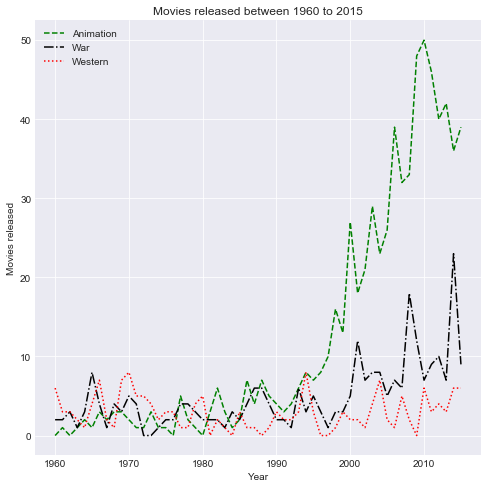

In [25]:
plt.figure(figsize=(8,8))
plt.plot(df_animation[:56], linewidth=1.5, linestyle='dashed', color='green')
plt.plot(df_war[:56], linewidth=1.5, linestyle='-.', color='black')
plt.plot(df_western[:56], linewidth=1.5, linestyle=':', color='red')
plt.xlabel('Year')
plt.ylabel("Movies released")
plt.title("Movies released between 1960 to 2015")
plt.legend(loc='best')
plt.show()

From the graph above, one can see animation started to rise exponentionally from 1994 until a peak of 2010. The creation of animation is an incredibly expensive process in time and money. You want to produce an animation that doesn't remove the audience's attention from the experience. The more fluid the animation, the more frames are required. This results in higher costs. Before the 1990's, computer processing was not able to compete with modern day standards with respect to processing power, hence, it required a longer time to produced these movies through either stop motion animation or hand drawn animation. Animation movies are still time-consuming to make but with the advent of more powerful processors (GPU's, CPU's, RAM etc.), they can be produced at a faster-time scale as compared to the 1990's.

Secondly, the war movies plot as shown above display a peak and valley plot. I believe these movies tend to be more director driven movies more than market driven (i.e what the movie goes want) since it does not follow a smooth upward trend. From the graph, it appears that movie studios do not want to saturate the market with too many war movies. I speculate the movie production companies would like to keep the mood of movies more cheerful and than dreary which a majority of war movies tend to be.

Finally, the western genre is a very niche genre that happens in a particular setting. We can see from the plot that a valley exists between 1970's to 1990's which there is a lull in the production of westers movies. This may suggest that audience got genre fatigue of seeing western movie genres. However, I would like to have compared it to another movie genre, <mark>film Noire</mark>, to see if their is a similar audience fatigue with the genre to say with more certainty that there is genre fatigue. It appears that niche genres tend to happen in cycle as shown by the plots of war genre and western genre.

### Top 4 companies profits from 1960 to 2015

This section would use the dataframe df_copy which contains 10866 samples.

In [26]:
a_test = df_copy.groupby('production_companies')['revenue'].sum()
a_test_sorted = a_test.sort_values(ascending=False)
a_test_sorted.head(10)

production_companies
Universal Pictures                        45071805063
Paramount Pictures                        43825267373
unspecified                               37675813205
Walt Disney Pictures                      35876900795
Columbia Pictures                         31981146369
Twentieth Century Fox Film Corporation    25727374114
New Line Cinema                           16239565556
Warner Bros.                              13230106460
Village Roadshow Pictures                 12489346393
DreamWorks SKG                            11227838411
Name: revenue, dtype: int64

In [27]:
a_test_sorted.tail(10)

production_companies
Gordon Bijelonic / Datari Turner Films    3003
Bloody Disgusting                         2756
KODA Entertainment                        1938
TrollhÃ¤ttan Film AB                       704
Sahara One Motion Pictures                 134
Picture Machine                            125
Pathe Productions                           23
chateau productions                         11
Filmhuset Gruppen                           11
Tales From The Crypt Holdings                5
Name: revenue, dtype: int64

 [Vogel, Harold L]("Entertainment Industry Economics." Cambridge University Press. 2001http://books.google.com/books?id=qxynbtC3JQgC&pg=PA117&lpg=PA117&dq=movie+studios+net+profit&source=web&ots=K3bl9c0WbT&sig=5jdMdKhDPaHuCjCMBxXOqjR8tnc&hl=en&sa=X&oi=book_result&resnum=10&ct=result#PPR7,M1) gives a general idea how to estimate marketing costs for blockbuster movies. They state that if a blockbuster movie cost 100 million USD in the production budget; at most, it costs 50 million USD to market the film. I could not attempt to make a column with the added cost of the market to the budget because it would be overestimating the cost of smaller movies. 

The top four companies are listed are: Universal Pictures, Paramount Pictures, Walt Disney Pictures, Columbia Pictures.


In [28]:
df_universal_copy = df_copy.query('production_companies == "Universal Pictures"')
df_paramount_copy = df_copy.query('production_companies == "Paramount Pictures"')
df_disney_copy = df_copy.query('production_companies == "Walt Disney Pictures"')
df_columbia_copy = df_copy.query('production_companies == "Columbia Pictures"')

I want to a seperate series containing each company's release year and the sum of profits that year.

In [29]:
df_universal_groupby = df_universal_copy.groupby('release_year')['revenue'].sum()
df_paramount_groupby = df_paramount_copy.groupby('release_year')['revenue'].sum()
df_disney_groupby = df_disney_copy.groupby('release_year')['revenue'].sum()
df_columbia_groupby = df_columbia_copy.groupby('release_year')['revenue'].sum()

Preparing the dataset to be plotted for analysis.

In [30]:
df_universal_groupby_df = pd.DataFrame(df_universal_groupby)
df_paramount_groupby_df = pd.DataFrame(df_paramount_groupby)
df_disney_groupby_df = pd.DataFrame(df_disney_groupby)
df_columbia_groupby_df = pd.DataFrame(df_columbia_groupby)


In [31]:
df_universal_groupby_df['release_year'] = df_universal_groupby_df.index
df_paramount_groupby_df['release_year'] = df_paramount_groupby_df.index
df_disney_groupby_df['release_year'] = df_disney_groupby_df.index
df_columbia_groupby_df['release_year'] = df_columbia_groupby_df.index

Plotting of the each company's profits from 1960 to 2015

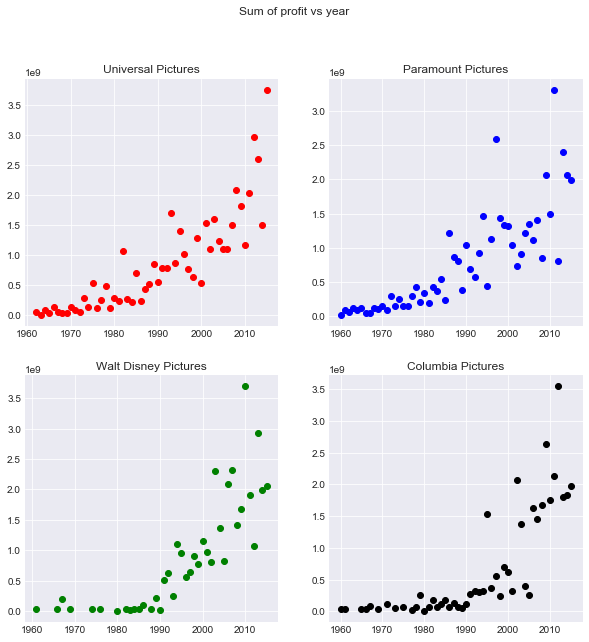

In [32]:
fig_1 = plt.figure(figsize=(10,10))
fig_1.suptitle("Sum of profit vs year")
# subplotting four top companies
ax_plot1 = fig_1.add_subplot(2,2,1)
ax_plot1.scatter(df_universal_groupby_df['release_year'], df_universal_groupby_df['revenue'], color='red')
ax_plot1.set_title("Universal Pictures")

ax_plot2 = fig_1.add_subplot(2,2,2)
ax_plot2.scatter(df_paramount_groupby_df['release_year'], df_paramount_groupby_df['revenue'], color='blue')
ax_plot2.set_title("Paramount Pictures")

ax_plot3 = fig_1.add_subplot(2,2,3)
ax_plot3.scatter(df_disney_groupby_df['release_year'], df_disney_groupby_df['revenue'], color='green')
ax_plot3.set_title("Walt Disney Pictures")

ax_plot4 = fig_1.add_subplot(2,2,4)
ax_plot4.scatter(df_columbia_groupby_df['release_year'], df_columbia_groupby_df['revenue'], color='black')
ax_plot4.set_title("Columbia Pictures")

plt.show()

In [33]:
revenue_2015 = df_disney_groupby_df.loc[df_disney_groupby_df.release_year == 2015]
print(revenue_2015-7.366e9)

                   revenue  release_year
release_year                            
2015         -5.303622e+09 -7.365998e+09


#### Analysis of the subplots.


All the subplots displayed an exponetial positive trend if a line of best fit was plotted through these graphs. [Walt Disney](https://www.thewaltdisneycompany.com/walt-disney-company-reports-fourth-quarter-earnings-full-year-earnings-fiscal-2016/) reported a year end at October 03, 2015 of 7.366 billion USD in revenue under their studio department. The difference between the dataset revenue sum and the reported Disney filings is 5.303 billion USD. I am under the impression that The Movie DataBase(tmdb) does not contain all the films for the year 2015 under Walt Disney Pictures or that through cleaning the dataset, we remove movies that Walt Disney Pictures help produced. **NOTE:** Upon further investigation of the dataset, the problem came that resulted in the drastic difference in revenue was that multiple studios that exists under Walt Disney Pictures were counted as seperate entities such LucasFilm, Marvel Studios, Pixar etc. Further work will require these studios to be renamed to Walt Disney Pictues.

Universal Pictures, Paramount Pictures, and Columbia Pictures have similar trends with increase in revenue through the year range. There reason for the increase in revenue for the top four companies could be a result an increase of movie goers and movie theaters across the globe. More movie goers, more potential customers to see their movie; especially, China.



### Research Question 3: Runtime correlation with vote_average and revenue correlation with vote_average

In [34]:
print("The max number vote count:{} and the minimum number vote count:{}".
      format(df_copy['vote_count'].max(), df_copy['vote_count'].min()))

The max number vote count:9767 and the minimum number vote count:10


Considering the large range between the maximum number of votes on a movie and minimum number of votes, I will use the median (plus or minus 1) of the vote average column as the mid point to declare that score is considered an <mark>okay</mark> movie. Anything above the median would be considered an <mark>good</mark> movie and a <mark>bad</mark> movie is below the median. 

In [35]:
print("The median score is:{}\n".format(df_copy['vote_average'].median()))
print("The max average score is:{} and the minimum average score is:{}"
     .format(df_copy['vote_average'].max(), df_copy['vote_average'].min()))

The median score is:6.0

The max average score is:9.2 and the minimum average score is:1.5


Exploratory look at top 10 films and top 10 worst films rated in the database.

In [36]:
b_test = df_copy.sort_values(by=['vote_average'], ascending = False)
b_test.head(10)

,id,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
3894,125336,14625701,39823319,The Story of Film: An Odyssey,Mark Cousins,900,Documentary,unspecified,2011-09-03,14,9.2,2011
538,224972,14625701,39823319,The Mask You Live In,Jennifer Siebel Newsom,88,Documentary,unspecified,2015-01-01,11,8.9,2015
2269,51299,14625701,39823319,Life Cycles,Derek Frankowski,47,Documentary,unspecified,2010-10-02,27,8.8,2010
1200,374430,14625701,39823319,Black Mirror: White Christmas,Carl Tibbetts,74,Drama|Horror|Mystery|Science Fiction|Thriller,unspecified,2014-12-16,41,8.8,2014
6911,24970,14625701,39823319,Pink Floyd: Pulse,David Mallet,145,Music,SMV Enterprises,2006-07-09,23,8.7,2006
2401,45644,14625701,39823319,Opeth: In Live Concert At The Royal Albert Hall,unspecified,163,Music,unspecified,2010-09-21,10,8.6,2010
3690,68450,14625701,39823319,The Art of Flight,Curt Morgan,80,Adventure|Documentary,Red Bull Media House,2011-09-08,60,8.5,2011
8411,25093,14625701,39823319,Queen - Rock Montreal,Saul Swimmer,138,Music,Edel records GmbH,1981-11-24,14,8.5,1981
8221,55676,14625701,39823319,A Personal Journey with Martin Scorsese Throug...,Martin Scorsese|Michael Henry Wilson,225,Documentary,Miramax Films,1995-05-21,11,8.5,1995
5830,282848,14625701,39823319,Doctor Who: The Time of the Doctor,James Payne,60,unspecified,unspecified,2013-12-25,26,8.5,2013


Upon looking at the top 10 best rated movies, I noticed they fall into niche categories such as documentary and music. There is an object misclassification within the dataset as well. "Movies" such Black Mirror: White Christmas should not be considered movies as fall within a TV series season timeline. It was Episode 4 of season 2 of the Black Mirror series.  


In [37]:
b_test.tail(10)

,id,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
9291,19157,14625701,39823319,Going Overboard,Valerie Breiman,99,Comedy,unspecified,1989-05-11,18,2.3,1989
6077,203351,14625701,39823319,Atlantic Rim,Jared Cohn,85,Action|Science Fiction,The Asylum,2013-07-09,21,2.2,2013
4910,86101,14625701,39823319,The Sleeper,Justin Russell,90,Horror|Comedy|Thriller,Gamma Knife Films,2012-01-31,10,2.2,2012
4859,116977,65000000,73706,Foodfight!,Lawrence Kasanoff,87,Animation|Action|Comedy|Family,Threshold Entertainment,2012-06-15,12,2.2,2012
7220,31117,14625701,9109322,Superbabies: Baby Geniuses 2,Bob Clark,88,Family|Comedy,Crystal Sky Worldwide,2004-08-27,11,2.1,2004
2373,40016,14625701,39823319,Birdemic: Shock and Terror,James Nguyen,95,Horror|Science Fiction,unspecified,2010-02-27,30,2.1,2010
3822,83896,14625701,39823319,Sand Sharks,Mark Atkins,87,Comedy|Horror|Science Fiction,Rogue State,2011-12-20,17,2.1,2011
4882,120846,14625701,39823319,Jurassic Shark,Brett Kelly,75,Action|Horror|Science Fiction,Dudez Productions,2012-09-21,13,2.0,2012
7772,25055,14625701,39823319,Transmorphers,Leigh Scott,86,Action|Adventure|Science Fiction,"Asylum, The",2007-06-26,10,1.5,2007
10865,22293,19000,39823319,Manos: The Hands of Fate,Harold P. Warren,74,Horror,Norm-Iris,2066-11-15,15,1.5,1966


At the bottom 10 spot, the movies are populated with our bias budget and revenue bias values. FoodFight movie had massive controversy over its production and release and has been lambasted for poor "everything". Most of these films are expected in the bottom tend to have low budgets if it is not specified in the database.

### Runtime correlation with vote_average
Taking the top 200 runtime films in descending order and the 200 runtime films in ascending order compare the two.

In [38]:
runtime_sorted_desc_df = df_copy.sort_values(by=['runtime'], ascending=False).head(200)
runtime_sorted_asce_df = df_copy.sort_values(by=['runtime'], ascending=True).head(200)

In [39]:
vote_runtime_sorted_desc = runtime_sorted_desc_df.groupby(['original_title'])['vote_average'].mean()
vote_runtime_sorted_asce = runtime_sorted_asce_df.groupby(['original_title'])['vote_average'].mean()

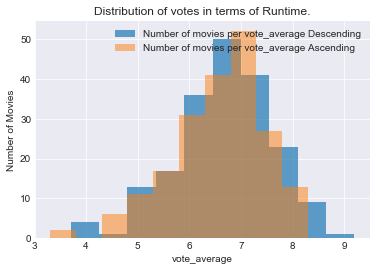

In [40]:
vote_runtime_sorted_desc.hist(histtype = 'stepfilled', label = 'Number of movies per vote_average Descending', alpha=0.7)
vote_runtime_sorted_asce.hist(histtype = 'stepfilled', label = 'Number of movies per vote_average Ascending', alpha=0.5)

plt.xlabel("vote_average")
plt.ylabel("Number of Movies")
plt.title("Distribution of votes in terms of Runtime.")
plt.legend(loc='best')


The longer movies appear to have better voter_average rating than shorter runtime movies. The tails of the descending order of runtime of movies with a max of 900 minutes at 9.2 and < 4.0 vote_average for the minimum. The shorter runtime movies, as shown from the graph, are centered around 6 to 8 vote_average rating. It may be better to have movie to produce shorter movies as shown by the graph to get more good ratings from the public. 

### Revenue correlation with vote average.

In [41]:
revenue_sorted_desc_df = df_copy.sort_values(by=['revenue'], ascending=False).head(200)
revenue_sorted_asce_df = df_copy.sort_values(by=['revenue'], ascending=True).head(200)

In [42]:
vote_revenue_sorted_desc = revenue_sorted_desc_df.groupby(['original_title'])['vote_average'].mean()
vote_revenue_sorted_asce = revenue_sorted_asce_df.groupby(['original_title'])['vote_average'].mean()

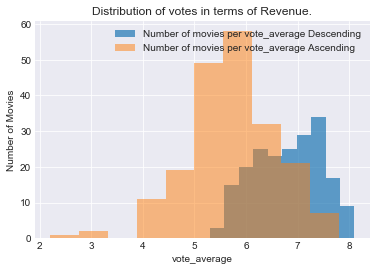

In [43]:
vote_revenue_sorted_desc.hist(histtype = 'stepfilled', label = 'Number of movies per vote_average Descending', alpha=0.7)
vote_revenue_sorted_asce.hist(histtype = 'stepfilled', label = 'Number of movies per vote_average Ascending', alpha=0.5)

plt.xlabel("vote_average")
plt.ylabel("Number of Movies")
plt.title("Distribution of votes in terms of Revenue.")
plt.legend(loc='best')


The more profitable movies are generally got better rating than the least profitable movies. The more profitable movies can be said to have a gaussian distribution skewed to the right while the least profitable movies have more centered gaussian distribution. One can make an inference that more profitable movies tend have a higher vote_average rating.

<a id='conclusions'></a>
## Conclusions
In conclusion, I examined three research questions to find most popular genres (examining three niche genres), looking at the top 4 grossing production companies and, examining vote_average correlations between revenue and runtime.

Data exploratory analysis found that niche genres tend to run in cycles going up and down in the number of movies produced each year. It was found that the top four companies showed a exponential rise in revenue generation over the year range for this dataset. Finally, the vote_average rating analysis showed the movies that have a longer runtime and higher revenue generation had higher average voter rating.

## limitations

When researching this dataset features to have description of what they mean, the information that was presented was non-existant or very vague. The 'popularity' column was only found through a forum post, and not on the website FAQ. Most of the information I gathered from the features were from intution and reading movie industry articles.

Secondly, I would like to have a list of companies listed under their parent companies so I can more accurately represent the revenue generated by these coporations. Currently, my analysis is wrong in terms of the actual revenue generated but the trend remains the same.



In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0